In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import preprocessor as p
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string
import inflect
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#import database
df = pd.read_csv("../Database/IMDB Dataset Cleaned.csv")
df = df[['cleaned_review', 'sentiment']]

In [3]:
#replace positive with 1 and negative with 0
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

# **Naive Bayes**

In [4]:
#naive bayes model for sentiment analysis using bag of words
#split data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size = 0.2, random_state = 0)

#bag of words
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [5]:
#naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [6]:
#predict
predictions = nb.predict(X_test)

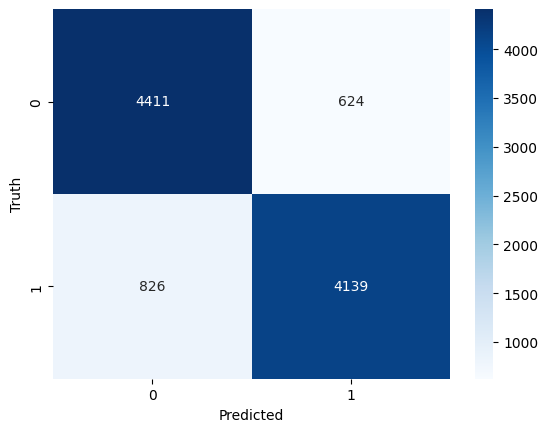

In [7]:
#confusion matrix
from sklearn.metrics import confusion_matrix

#use seaborn to plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#axis labels
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [8]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report
print('Classification Report: ', classification_report(y_test, predictions))

#accuracy score in percentage
print('Accuracy Score: ', accuracy_score(y_test, predictions)*100, '%')

Classification Report:                precision    recall  f1-score   support

           0       0.84      0.88      0.86      5035
           1       0.87      0.83      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

Accuracy Score:  85.5 %
